In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from glob import glob
from PIL import Image
from numpy import asarray

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.applications import vgg19, resnet50
from keras.applications.densenet import DenseNet121
from keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Input
from keras.models import Model, model_from_json, load_model, save_model
from keras.preprocessing import image
import tempfile
import pickle



In [2]:
path = os.listdir('Brain_Tumor_Data')
classes = {'no_tumor':0, 'pituitary_tumor':1, 'glioma_tumor':2, 'meningioma_tumor':3}

In [3]:
no_tumor_frompath= 'Brain_Tumor_Data/Training/no_tumor'
no_tumor_topath = 'Brain_Tumor_Data/Agumented_Data/Training/no_tumor/'
no_tumor_images=glob(no_tumor_frompath+'/*')
c=0
for path in no_tumor_images:
  img=Image.open(path)
  img = img.convert("RGB")
  img=img.resize((224,224))
  img.save(no_tumor_topath+str(c)+'.jpg')
  c+=1
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
  mirimg.save(no_tumor_topath+str(c)+'.jpg')
  c+=1
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
  rotimg.save(no_tumor_topath+str(c)+'.jpg')
  c+=1
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)
  mirrotimg.save(no_tumor_topath+str(c)+'.jpg')
  c+=1

In [4]:
frompath = 'Brain_Tumor_Data/Training/pituitary_tumor'
topath = 'Brain_Tumor_Data/Agumented_Data/Training/pituitary_tumor/'
images=glob(frompath+'/*')
c=0
for path in images:
  img=Image.open(path)
  img = img.convert("RGB")
  img=img.resize((224,224))
  img.save(topath+str(c)+'.jpg')
  c+=1
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
  mirimg.save(topath+str(c)+'.jpg')
  c+=1
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
  rotimg.save(topath+str(c)+'.jpg')
  c+=1
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)
  mirrotimg.save(topath+str(c)+'.jpg')
  c+=1

In [5]:
frompath = 'Brain_Tumor_Data/Training/glioma_tumor'
topath = 'Brain_Tumor_Data/Agumented_Data/Training/glioma_tumor/'
images=glob(frompath+'/*')
c=0
for path in images:
  img=Image.open(path)
  img = img.convert("RGB")
  img=img.resize((224,224))
  img.save(topath+str(c)+'.jpg')
  c+=1
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
  mirimg.save(topath+str(c)+'.jpg')
  c+=1
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
  rotimg.save(topath+str(c)+'.jpg')
  c+=1
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)
  mirrotimg.save(topath+str(c)+'.jpg')
  c+=1

In [6]:
frompath = 'Brain_Tumor_Data/Training/meningioma_tumor'
topath = 'Brain_Tumor_Data/Agumented_Data/Training/meningioma_tumor/'
images=glob(frompath+'/*')
c=0
for path in images:
  img=Image.open(path)
  img = img.convert("RGB")
  img=img.resize((224,224))
  img.save(topath+str(c)+'.jpg')
  c+=1
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
  mirimg.save(topath+str(c)+'.jpg')
  c+=1
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
  rotimg.save(topath+str(c)+'.jpg')
  c+=1
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)
  mirrotimg.save(topath+str(c)+'.jpg')
  c+=1

In [7]:
import cv2
X=[]
Y=[]
for cls in classes:
  pth = 'Brain_Tumor_Data/Agumented_Data/Training/'+cls
  for j in os.listdir(pth):
    img = cv2.imread(pth+'/'+j)   
    # img = cv2.resize(img,dsize=(224,224))
    X.append(img)
    Y.append(classes[cls])

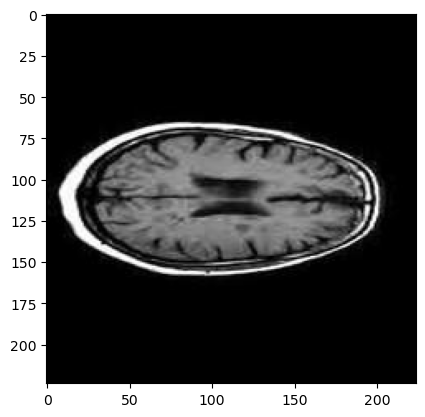

In [8]:
plt.imshow(X[4],cmap='gray')

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.20)
print ("Shape of an image in x_train: ", x_train[0].shape)
print ("Shape of an image in x_test: ", x_test[0].shape)

Shape of an image in x_train:  (224, 224, 3)
Shape of an image in x_test:  (224, 224, 3)


In [10]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)
y_train = np.array(y_train)
x_train = np.array(x_train)
y_test = np.array(y_test)
x_test = np.array(x_test) 
print("x_train Shape: ", x_train.shape) 
print("x_test Shape: ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

x_train Shape:  (18278, 224, 224, 3)
x_test Shape:  (4570, 224, 224, 3)
y_train Shape:  (18278, 4)
y_test Shape:  (4570, 4)


In [11]:
base_vgg19 = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_vgg19.layers:
    layer.trainable = False

In [12]:
base_resnet50 = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_resnet50.layers:
    layer.trainable = False

In [13]:
base_dense = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_dense.layers:
    layer.trainable = False

In [14]:
input_layer = Input(shape=(224,224,3))

In [15]:
vgg19_out    = base_vgg19(input_layer)
resnet50_out = base_resnet50(input_layer)
dense_out    = base_dense(input_layer)

In [16]:
vgg19_out    = GlobalAveragePooling2D()(vgg19_out)
resnet50_out = GlobalAveragePooling2D()(resnet50_out)
dense_out    = GlobalAveragePooling2D()(dense_out)

In [17]:
fusion = Concatenate()([vgg19_out, resnet50_out, dense_out])


In [18]:
fusion = Dense(1024, activation='relu')(fusion)
fusion = Dense(1024, activation='relu')(fusion)
fusion = Dense(512, activation='relu')(fusion)
output = Dense(4, activation='softmax')(fusion)

In [19]:
model = Model(inputs=input_layer, outputs=output)

In [20]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg19 (Functional)  │ (None, 7, 7, 512) │ 20,024,384 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ input_layer_3[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet121         │ (None, 7, 7,      │  7,037,504 │ input_layer_3[0]… │
│ (Functional)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg19[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ densenet121[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 3584)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1024)      │  3,671,040 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1024)      │  1,049,600 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    524,800 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      2,052 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 55,897,092 (213.23 MB)

 Trainable params: 5,247,492 (20.02 MB)

 Non-trainable params: 50,649,600 (193.21 MB)

None


In [21]:
def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = {'model_str': model_str}
        return d

    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            mdl = load_model(fd.name)
        self.__dict__.update(mdl.__dict__)

    cls = Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__

make_keras_picklable()

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1,
    initial_epoch=0
)

Epoch 1/20
572/572 ━━━━━━━━━━━━━━━━━━━━ 4514s 8s/step - accuracy: 0.8110 - loss: 0.5029 - val_accuracy: 0.9219 - val_loss: 0.2108
Epoch 2/20
572/572 ━━━━━━━━━━━━━━━━━━━━ 5275s 9s/step - accuracy: 0.9300 - loss: 0.1894 - val_accuracy: 0.9411 - val_loss: 0.1705
Epoch 3/20
572/572 ━━━━━━━━━━━━━━━━━━━━ 5104s 9s/step - accuracy: 0.9507 - loss: 0.1293 - val_accuracy: 0.9291 - val_loss: 0.2147
Epoch 4/20
572/572 ━━━━━━━━━━━━━━━━━━━━ 4942s 9s/step - accuracy: 0.9627 - loss: 0.1059 - val_accuracy: 0.9462 - val_loss: 0.1431
Epoch 5/20
572/572 ━━━━━━━━━━━━━━━━━━━━ 5145s 9s/step - accuracy: 0.9680 - loss: 0.0947 - val_accuracy: 0.9744 - val_loss: 0.0782
Epoch 6/20
572/572 ━━━━━━━━━━━━━━━━━━━━ 5142s 9s/step - accuracy: 0.9737 - loss: 0.0739 - val_accuracy: 0.9766 - val_loss: 0.0699
Epoch 7/20
572/572 ━━━━━━━━━━━━━━━━━━━━ 4906s 9s/step - accuracy: 0.9760 - loss: 0.0707 - val_accuracy: 0.9492 - val_loss: 0.1322
Epoch 8/20
572/572 ━━━━━━━━━━━━━━━━━━━━ 6614s 12s/step - accuracy: 0.9734 - loss: 0.0728 -

In [25]:
filename = 'brain_tumor_fusion_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [34]:
import pickle

filename = 'brain_tumor_fusion_model.pkl'

with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

In [35]:
y_pred = loaded_model.predict(x_test)

143/143 ━━━━━━━━━━━━━━━━━━━━ 1063s 7s/step


In [36]:
import numpy as np

y_pred_classes = np.argmax(y_pred, axis=1) 
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.38%


In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_classes)
print(f'Overall Accuracy: {accuracy * 100:.2f}%')

Overall Accuracy: 98.38%


In [38]:
from sklearn.metrics import classification_report

print("Class-wise Classification Report:\n")
print(classification_report(y_test.argmax(axis=1), y_pred_classes))

Class-wise Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1277
           1       0.99      0.99      0.99      1168
           2       0.97      0.98      0.98      1060
           3       0.98      0.96      0.97      1065

    accuracy                           0.98      4570
   macro avg       0.98      0.98      0.98      4570
weighted avg       0.98      0.98      0.98      4570



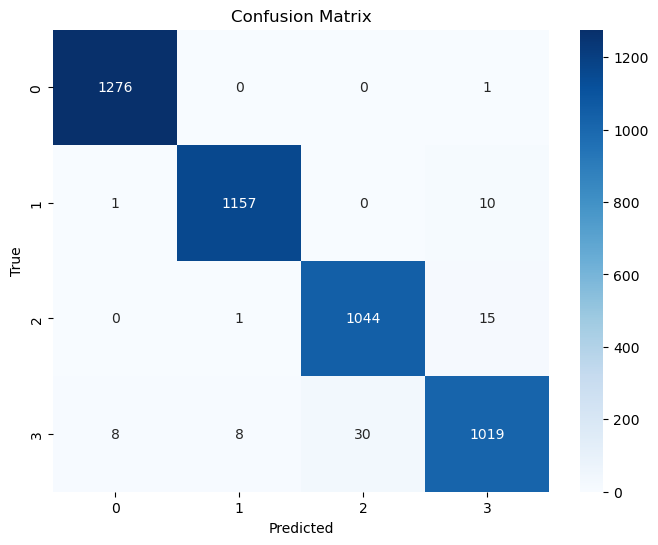

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test.argmax(axis=1)), yticklabels=np.unique(y_test.argmax(axis=1)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

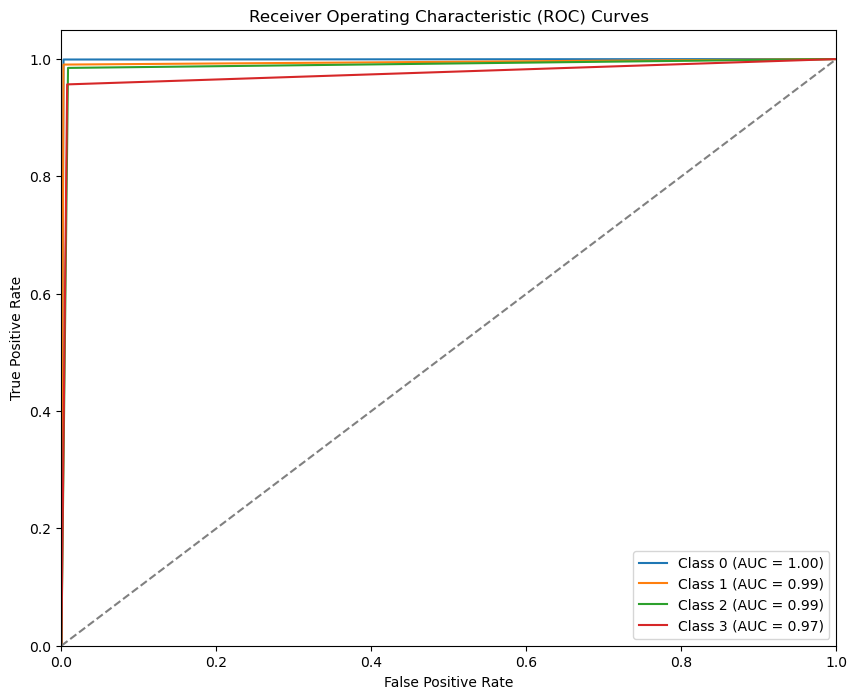

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test.argmax(axis=1), classes=np.unique(y_test.argmax(axis=1)))
y_pred_bin = label_binarize(y_pred_classes, classes=np.unique(y_test.argmax(axis=1)))

plt.figure(figsize=(10, 8))

n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], y_pred_bin[:, i])
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test.argmax(axis=1), classes=np.unique(y_test.argmax(axis=1)))
y_pred_bin = label_binarize(y_pred_classes, classes=np.unique(y_test.argmax(axis=1)))

n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    auc_score = roc_auc_score(y_test_bin[:, i], y_pred_bin[:, i])
    print(f'Class {i} AUC: {auc_score:.2f}')

Class 0 AUC: 0.99
Class 1 AUC: 0.99
Class 2 AUC: 0.97
Class 3 AUC: 0.97


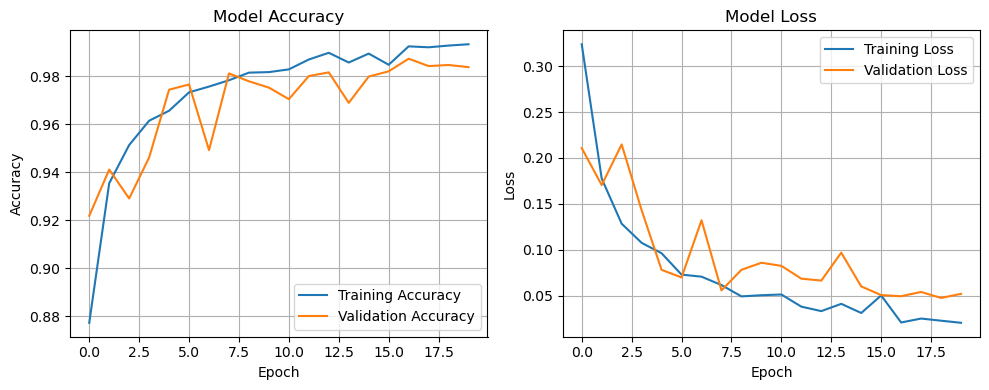

In [41]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Plot training & validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()